In [1]:
'''
자동완성기능: .하고 몇단어 입력후 tab키
함수 사용법:.함수명?  후 shift+enter혹은 
            .함수명 shift+tab키
리눅스명령어:%명령어

'''
#라이브러리 불러오기
import numpy as np
import pandas as pd

In [2]:
#시각화용 라이브러리
#matplotlib기반의 통계기능이 내장된 하이레벨의 시각화 라이브러리
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.font_manager as fm
from matplotlib import rc

In [5]:
font= fm.FontProperties(fname=r'C:\Windows\Fonts\gulim.ttc',size=18).get_name()
rc('font',family=font)

In [6]:
#https://github.com/mwaskom/seaborn-data/blob/master/tips.csv
#https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset
df = sns.load_dataset('tips')#내장된 샘플 데이타파일 로드=>데이타프레임으로 변환됨


In [7]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [8]:
df.shape

(244, 7)

In [9]:
df.head(10)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

In [10]:
df.info()#각 컬럼의 정보(NaN데이타 존재여부,컬럼의 dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
df.columns#컬럼명 출력

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [12]:
df.dtypes##각 컬럼별 타입

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [13]:
df.isnull().sum()#True 1,False 0으로 계산됨. 각 컬럼별 NaN갯수 파악(df.isnull():불리언 마스크(데이타프레임))

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [14]:
df['smoker'].isna().sum()#특정의 결측치 갯수 보기

0

## 판다스의 plot()함수로 시각화

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


<AxesSubplot:>

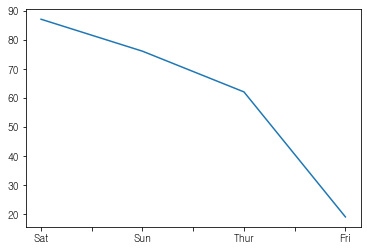

In [15]:
#value_counts():day컬럼(범주형 데이타)의 각 값별로 빈도수 구하는 함수.시리즈 반환
#시리즈의 색인이 X데이타,시리즈의 1차원배열 데이타가 Y데이타가 된다
#plot():디폴트는 line plot
print(df['day'].value_counts())
df['day'].value_counts().plot()

<AxesSubplot:>

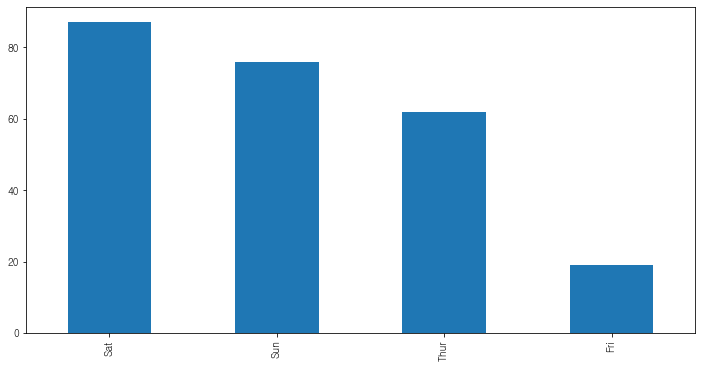

In [16]:
'''
히스토그램은 연속형의 수치 데이터를 막대로 표시 
막대 그래프는 범주형 데이터의 빈도수를 막대로 표시 
히스토그램은 막대 사이에 간격이 없도록 그려진다.
히스토그램은 가로측에 반드시 수량
막대 그래프는 수량이 아니어도 된다
'''
df['day'].value_counts().plot.bar(figsize=(12,6))

<AxesSubplot:>

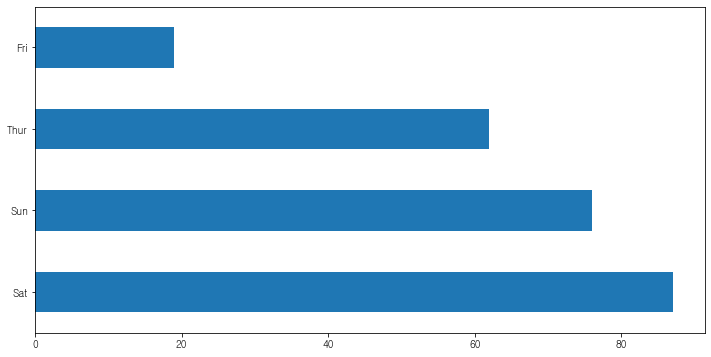

In [17]:
df['day'].value_counts().plot(kind='barh',figsize=(12,6))#X축에는 빈도수,Y축에는 범주형 데이타

<AxesSubplot:ylabel='Frequency'>

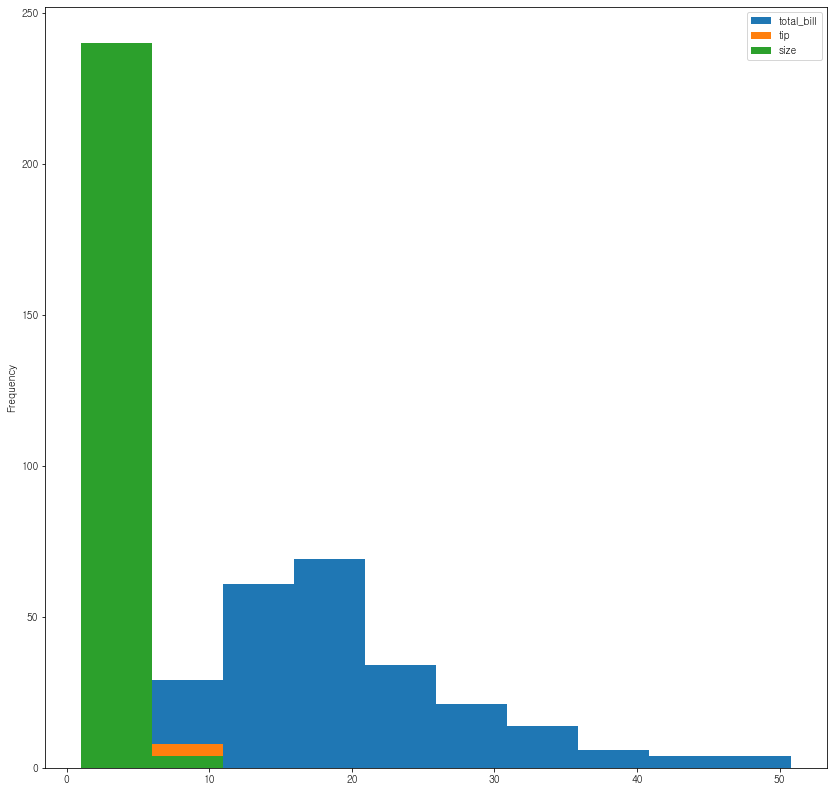

In [18]:
#100만개가 넘는 데이터를 시각화할 때는 시각화하는 속도가 느리기 때문에  샘플랭하거나 혹은 groupby(또는 pivot_table)로 
#연산을 하여 시각화하거나 필요한 데이터만 추출해서 시각화 하자
#df.plot(kind='hist')#수치형 데이타만 표시.(범주형 데이타는 제외)
df.plot.hist(figsize=(14,14))#X축에는 수치데이타,Y축에는 빈도의 범위값

In [19]:
#슬라이싱을 해서 특정한 행, 열을 선택해서 그리기.
#total_bill컬럼과 tip컬럼만 hist그램으로 그리기(연속형의 수치 데이타임으로)


<AxesSubplot:ylabel='Frequency'>

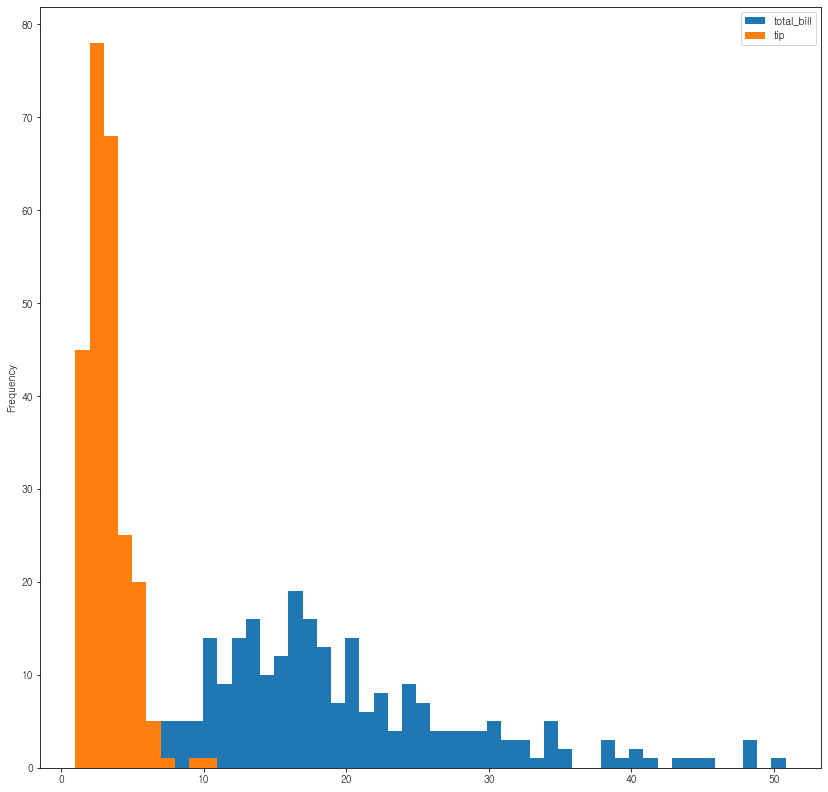

In [20]:
df.iloc[:,:2].plot.hist(figsize=(14,14),bins=50)

<AxesSubplot:title={'center':'흡연자 구성비'}, xlabel='smoker', ylabel='count'>

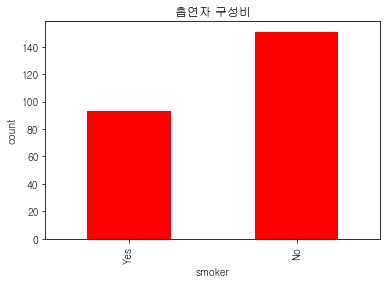

In [21]:
plt.title('흡연자 구성비')
plt.xlabel('smoker')
plt.ylabel('count')
#df['smoker'].value_counts().plot.bar(color='r')#범주형별로 빈도수(value_counts()구해서 막대 그래프로 시각화
df.groupby('smoker').size().plot.bar(color='r')

## Seaborn으로 시각화

#### countplot() :1차원 데이타이면서  범주형 데이타로 시각화(막대그래프)

##### 범주형별로 빈도수(count)를 계산(내부적으로)해서 막대 그래프로 시각화
##### x혹은 y중 하나만 지정한다. 
##### countplot(x='범주형 컬럼명',data=데이타프레임 혹은 시리즈) 내부적으로 지정한 컬럼에 대해 빈도수를 구한다 즉(value_counts()를 사용할 필요없다)

<AxesSubplot:title={'center':'흡연자 구성비'}, xlabel='smoker', ylabel='count'>

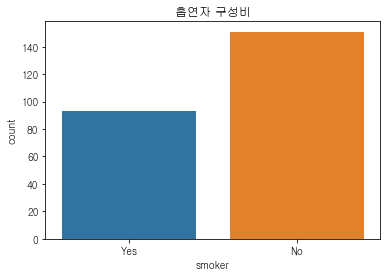

In [22]:
plt.title('흡연자 구성비')
sns.countplot(x='smoker',data=df)#X축이 범주형 데이타,Y축이 빈도수.비 흡연자가 더 많다
#sns.countplot(y='smoker',data=df)#Y축이 범주형 데이타,X축이 빈도수

<AxesSubplot:xlabel='sex', ylabel='count'>

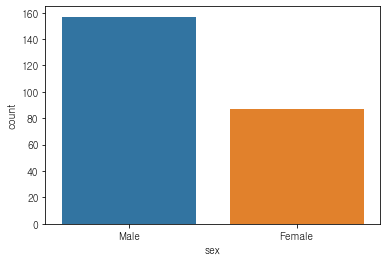

In [23]:
sns.countplot(x='sex',data=df)#남성이 여성보다 인원이 많다

<AxesSubplot:xlabel='day', ylabel='count'>

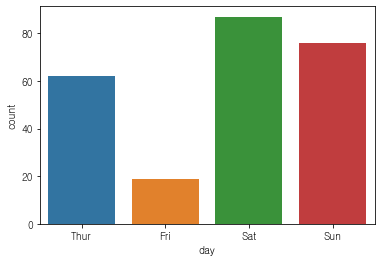

In [24]:
sns.countplot(x='day',data=df)#토요일에 가장 많이 갔구나

<AxesSubplot:xlabel='time', ylabel='count'>

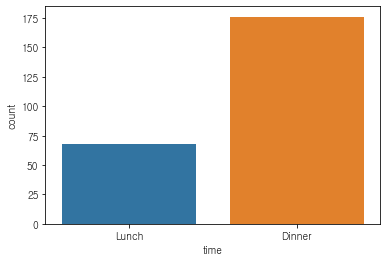

In [25]:
sns.countplot(x='time',data=df)#저녁시간대

<AxesSubplot:xlabel='smoker', ylabel='count'>

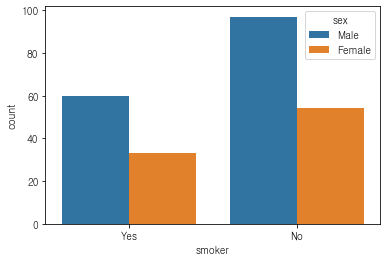

In [26]:
#hue인자에 범주형 컬럼명을 지정: 범주형 컬럼 데이타별(남성,여성)로 x에 지정한 컬럼 데이터의
#빈도수를 시각화
#흡연자/비흡연자별 여성과 남성의 빈도수
sns.countplot(x='smoker',data=df,hue='sex')#남성이 흡연자뿐 아니라 비흡연자수가 많구나

<AxesSubplot:xlabel='day', ylabel='count'>

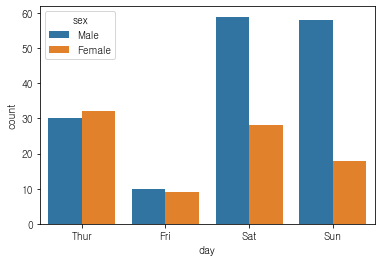

In [27]:
#각 요일별 남성과 여성의 방문 빈도
sns.countplot(x='day',data=df,hue='sex')

#### barplot:연속적인 수치형데이타(평균)와 범주형 데이타로  시각화(막대그래프)

#####  수치형 데이타의 평균(디폴트-빈도수가 아님)을 구해서 막대로 표시해준다
#####  예를 들면 x가 'day'이고 y가  'tip'이라면
#####  day별로 tip의 평균을 구해서 막대로 시각화 .
##### 데이타가 많은 경우 속도가 느리다
##### 막대위에 선은 신뢰구간(95%) ci="sd"를 추가시  표준편차 기준,ci=None을 주면 
##### 신뢰구간을 그리지 않는다 즉 속도가 빠르다

<AxesSubplot:xlabel='day', ylabel='tip'>

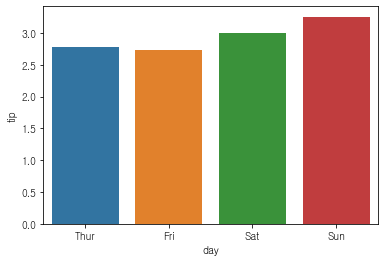

In [28]:
sns.barplot(x='day',y='tip',data=df,ci=None)#X축에는 범주형 데이타 컬럼,Y축에는 연속형 수치데이타 컬럼.평균이 디폴트(estimator=np.mean)

<AxesSubplot:xlabel='day', ylabel='tip'>

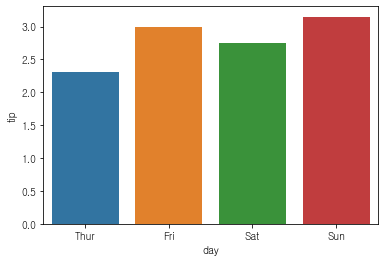

In [29]:
sns.barplot(x='day',y='tip',data=df,ci=None,estimator=np.median)

#### lineplot:barplot과 사용법 동일

##### 주로 시계열 데이타등을 시각화 즉 주식가격변동 데이터 시각화시 주로 사용
#####  신뢰구간이나 편차는 그림자로 표시

<AxesSubplot:xlabel='day', ylabel='tip'>

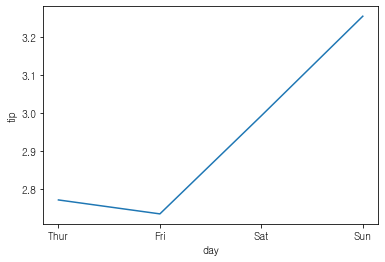

In [30]:
#x축는 요일 데이타 y축은 tip 평균(estimator=mean이 디폴트)
#요일별 총 지출의 평균 금액을 라인으로 시각화
sns.lineplot(data=df,x='day',y='tip',ci=None)#X축에는 시계열데이타 컬럼,Y축에는 연속형 수치데이타 컬럼.평균이 디폴트(estimator=np.mean)

<AxesSubplot:xlabel='day', ylabel='tip'>

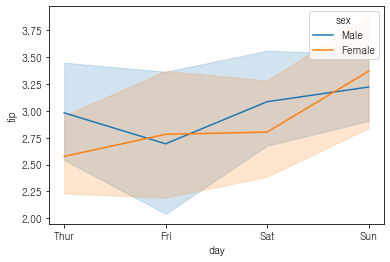

In [31]:
#요일별 팁 지출 평균을 각 성별로 비교하는 그래프
sns.lineplot(data=df,x='day',y='tip',hue='sex')

#### pointplot : barplot과 사용법 동일

##### 점(point)으로 데이타 표시
##### 신뢰구간이나 편차는 막대로 표시

<AxesSubplot:xlabel='day', ylabel='tip'>

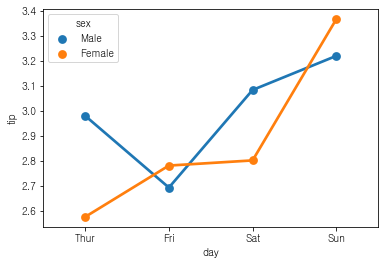

In [32]:
sns.pointplot(data=df,x='day',y='tip',ci=None,hue='sex')

#### rugplot: 1차원 벡터형태의 실수값(연속형  수치형 데이타) 사용.

##### 동일한 길이의 작은 선분(rug)으로 실제 데이터들의 위치만을 표시하여(X축에)
###### 데이타의 밀집 구간 파악 용이
##### rug 플롯은 데이터 위치를 X축 위에 일정한 길이의 선분(rug)으로 나타내어 
##### 실제 데이터들의 위치를 시각화하여 분포를 파악할수 있다

In [33]:
total_bill=df['total_bill']

In [34]:
total_bill.mean()#total_bill.max():최대값 50.81,total_bill.min() 3.07,total_bill.mean() 19.7

19.78594262295082

<AxesSubplot:xlabel='total_bill'>

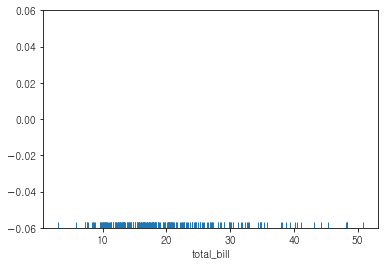

In [35]:
#sns.rugplot(x='total_bill',data=df)
sns.rugplot(total_bill)#총지 출이 10달라에서 20달라 사이의 총 지출이 많음

#### kdeplot : 데이타가 연속형인 실수값 시각화

##### kernel density estimation의 약자. 확률 밀도를 추정
##### 히스토그램보다 부드러운 형태의 분포 곡선을 표시
##### 2개의 1차원 실수값 사용시 2차원 확률밀도 그래프

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

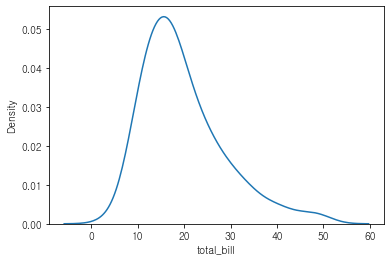

In [36]:
sns.kdeplot(x=total_bill)##한개의 1차원 실수 데이타 시각화

In [37]:
tip=df['tip']#df['tip'].values

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

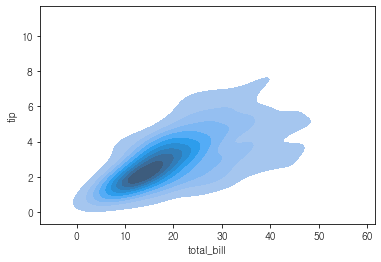

In [38]:
#총지출은 10 ~20달라를 가장 많이 지출했고 팁은 1달라에서 3달라 사이가
#가장 밀집되어 있다
sns.kdeplot(x=total_bill,y=tip,shade=True)#2개의 실수 데이타 시각화.shade인자를 주면 총 지출 과 팁 지출이 밀집된 부분이 진하게 표시된다(2차원 확률밀도 그래프)

#### distplot : 히스토그램과 rugplot을 동시에 시각화

##### rug와 히스토그램 동시에 표시가능(rug=False이 디폴트)


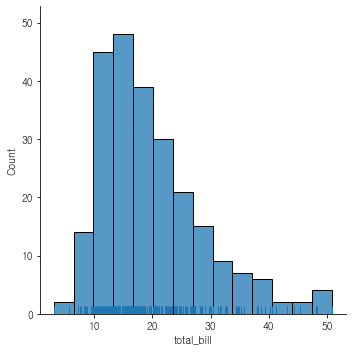

In [39]:
sns.displot(x=total_bill,rug=True)

#### jointplot : 데이터프레임에만 사용,데이타가 모두 실수값인 경우

##### scatter plot을 그리고 그래프의 가장자리에는 각 변수의 히스토그램도 그린다

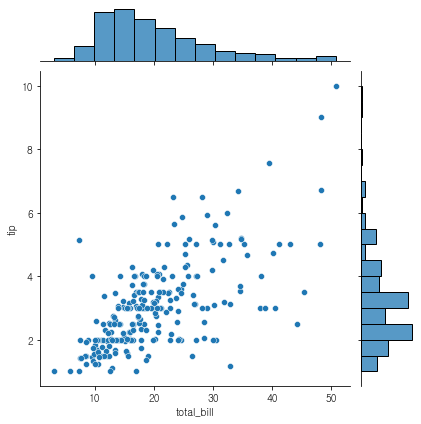

In [40]:
sns.jointplot(x='total_bill',y='tip',data=df)#총 지출은 10~20 팁은 1~3달라 사이가 가장 많다.kind='scatter'(디폴트)

#### heatmap : 데이타가 실수형 혹은 범주형(카테고리화된 숫자)인 경우

##### https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D  상관 분석
##### 상관계수: 변수들 간의 상관 관계를 알아볼 때 유용한 개념으로. 
##### 상관계수는 -1부터 1사이로 구성되고, 0.3부터 0.7 사이면 뚜렷한 양적 선형관계, 0.7 이상이면 강한 양적 상관관계라 할 수 있다.(피어슨 상관계수)
##### heatmap은 열을 뜻하는 히트(heat)와 지도를 뜻하는 맵(map)을 결합시킨 단어로
##### 데이타간의 상관 관계를 색상으로 열분포 형태의 비주얼한 그래픽으로 출력 

In [41]:
df_corr=df.corr()##상관계수를 계산할 때 대각선이 1인 이유는 자기자신이기때문. -는 음의 상관관계이고, +는 양의 상관관계
#size 와 total_bill은 tip과  뚜렷한 양적 선형관계를 가지고 있다

<AxesSubplot:>

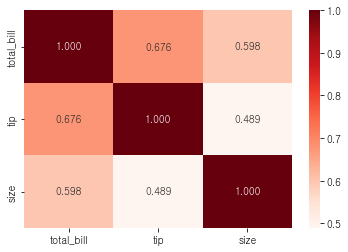

In [42]:
sns.heatmap(data=df_corr,cmap='Reds',annot=True,fmt='.3f')

#### boxplot : 범주형 데이터와 연속 수치형 데이터로 박스형태의 그래프 그리기

##### Boxplot은 박스와 박스 바깥의 선(whisker)으로 이루어진 그래프로
##### 아웃라이어(outlier) 발견이 쉽다

In [43]:
'''
전체 데이터를 순서대로 4등분 하는 3개의 수 Q1, Q2, Q3 

제 1사분위수(Q1) - 25 백분위수
제 2사분위수(Q2) - 50 백분위수. 중앙값과 같다
제 3사분위수(Q3) - 75 백분위수

제 1사분위 수와 제 3사분위수 사이의 거리 :IQR(InterQuartile Range)
Q3 - Q1 

최소값 혹은 (Q1-1.5 *IQR) - Q1(25%) - Median(50%) - Q3(75%)-최대값 혹은 (Q3+1.5 *IQR)

중앙값 공식
N개의 데이타가 홀수 일때 (N+1)/2번째 값
N개의 데이타가 짝수 일때 N/2번째와 N/2번째 +1의 평균갑
'''

'\n전체 데이터를 순서대로 4등분 하는 3개의 수 Q1, Q2, Q3 \n\n제 1사분위수(Q1) - 25 백분위수\n제 2사분위수(Q2) - 50 백분위수. 중앙값과 같다\n제 3사분위수(Q3) - 75 백분위수\n\n제 1사분위 수와 제 3사분위수 사이의 거리 :IQR(InterQuartile Range)\nQ3 - Q1 \n\n최소값 혹은 (Q1-1.5 *IQR) - Q1(25%) - Median(50%) - Q3(75%)-최대값 혹은 (Q3+1.5 *IQR)\n\n중앙값 공식\nN개의 데이타가 홀수 일때 (N+1)/2번째 값\nN개의 데이타가 짝수 일때 N/2번째와 N/2번째 +1의 평균갑\n'

<AxesSubplot:xlabel='day', ylabel='total_bill'>

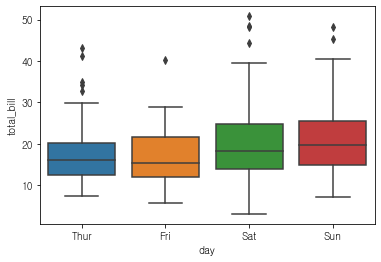

In [44]:
sns.boxplot(x='day',y='total_bill',data=df)#X는 범주형 데이타,Y축은 실수형 데이타

In [45]:
#목요일행만 추출
#df[df['day']=='Thur'].sort_values(by='total_bill')
df_thur=df[df['day']=='Thur']
df_thur.sort_values(by='total_bill')

total_bill   tip     sex smoker   day   time  size
149        7.51  2.00    Male     No  Thur  Lunch     2
195        7.56  1.44    Male     No  Thur  Lunch     2
145        8.35  1.50  Female     No  Thur  Lunch     2
135        8.51  1.25  Female     No  Thur  Lunch     2
126        8.52  1.48    Male     No  Thur  Lunch     2
..          ...   ...     ...    ...   ...    ...   ...
83        32.68  5.00    Male    Yes  Thur  Lunch     2
141       34.30  6.70    Male     No  Thur  Lunch     6
85        34.83  5.17  Female     No  Thur  Lunch     4
142       41.19  5.00    Male     No  Thur  Lunch     5
197       43.11  5.00  Female    Yes  Thur  Lunch     4

[62 rows x 7 columns]

In [46]:
df_thur['total_bill'].median()#목요일의 총지출 중앙값(2사분위수)

16.2

In [47]:
df_thur.describe()

total_bill        tip       size
count   62.000000  62.000000  62.000000
mean    17.682742   2.771452   2.451613
std      7.886170   1.240223   1.066285
min      7.510000   1.250000   1.000000
25%     12.442500   2.000000   2.000000
50%     16.200000   2.305000   2.000000
75%     20.155000   3.362500   2.000000
max     43.110000   6.700000   6.000000

In [48]:
#목요일에 100%에 해당하는 30초과 지출에 해당하는 행들만 추출
print(1.5*(20.155-12.4425)+20.155)
max=1.5*(20.155-12.4425)+20.155
outlier=df_thur[df_thur['total_bill'] > max]

31.723750000000003


In [49]:
outlier.index#아웃라이어(이상치)의 행 색인

Int64Index([83, 85, 141, 142, 197], dtype='int64')

In [50]:
df_thur.drop(outlier.index)#목요일 데이타 중 이상치 제거(여러행 제거) drop(행인덱스)

total_bill   tip     sex smoker   day    time  size
77        27.20  4.00    Male     No  Thur   Lunch     4
78        22.76  3.00    Male     No  Thur   Lunch     2
79        17.29  2.71    Male     No  Thur   Lunch     2
80        19.44  3.00    Male    Yes  Thur   Lunch     2
81        16.66  3.40    Male     No  Thur   Lunch     2
82        10.07  1.83  Female     No  Thur   Lunch     1
84        15.98  2.03    Male     No  Thur   Lunch     2
86        13.03  2.00    Male     No  Thur   Lunch     2
87        18.28  4.00    Male     No  Thur   Lunch     2
88        24.71  5.85    Male     No  Thur   Lunch     2
89        21.16  3.00    Male     No  Thur   Lunch     2
117       10.65  1.50  Female     No  Thur   Lunch     2
118       12.43  1.80  Female     No  Thur   Lunch     2
119       24.08  2.92  Female     No  Thur   Lunch     4
120       11.69  2.31    Male     No  Thur   Lunch     2
121       13.42  1.68  Female     No  Thur   Lunch     2
122       14.26  2.50    Male     No  Thur   Lunch     2
123       15.95  2.00    Male     No  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
125       29.80  4.20  Female     No  Thur   Lunch     6
126        8.52  1.48    Male     No  Thur   Lunch     2
127       14.52  2.00  Female     No  Thur   Lunch     2
128       11.38  2.00  Female     No  Thur   Lunch     2
129       22.82  2.18    Male     No  Thur   Lunch     3
130       19.08  1.50    Male     No  Thur   Lunch     2
131       20.27  2.83  Female     No  Thur   Lunch     2
132       11.17  1.50  Female     No  Thur   Lunch     2
133       12.26  2.00  Female     No  Thur   Lunch     2
134       18.26  3.25  Female     No  Thur   Lunch     2
135        8.51  1.25  Female     No  Thur   Lunch     2
136       10.33  2.00  Female     No  Thur   Lunch     2
137       14.15  2.00  Female     No  Thur   Lunch     2
138       16.00  2.00    Male    Yes  Thur   Lunch     2
139       13.16  2.75  Female     No  Thur   Lunch     2
140       17.47  3.50  Female     No  Thur   Lunch     2
143       27.05  5.00  Female     No  Thur   Lunch     6
144       16.43  2.30  Female     No  Thur   Lunch     2
145        8.35  1.50  Female     No  Thur   Lunch     2
146       18.64  1.36  Female     No  Thur   Lunch     3
147       11.87  1.63  Female     No  Thur   Lunch     2
148        9.78  1.73    Male     No  Thur   Lunch     2
149        7.51  2.00    Male     No  Thur   Lunch     2
191       19.81  4.19  Female    Yes  Thur   Lunch     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
193       15.48  2.02    Male    Yes  Thur   Lunch     2
194       16.58  4.00    Male    Yes  Thur   Lunch     2
195        7.56  1.44    Male     No  Thur   Lunch     2
196       10.34  2.00    Male    Yes  Thur   Lunch     2
198       13.00  2.00  Female    Yes  Thur   Lunch     2
199       13.51  2.00    Male    Yes  Thur   Lunch     2
200       18.71  4.00    Male    Yes  Thur   Lunch     3
201       12.74  2.01  Female    Yes  Thur   Lunch     2
202       13.00  2.00  Female    Yes  Thur   Lunch     2
203       16.40  2.50  Female    Yes  Thur   Lunch     2
204       20.53  4.00    Male    Yes  Thur   Lunch     4
205       16.47  3.23  Female    Yes  Thur   Lunch     3
243       18.78  3.00  Female     No  Thur  Dinner     2

####  scatterplot : 수치형 데이타들의 산점도 표시

##### x,y에 수치형 데이타

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

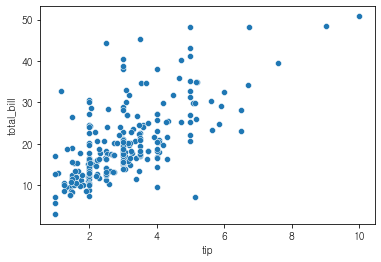

In [51]:
sns.scatterplot(x='tip',y='total_bill',data=df)#선형관계

<AxesSubplot:xlabel='tip', ylabel='size'>

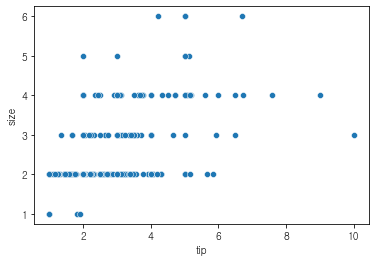

In [52]:
sns.scatterplot(x='tip',y='size',data=df)

#### lmplot:라인플롯의 일종으로 스케터와 라인으로 수치형 데이타간의 선형관계(회귀)를  
#### 여러  서브플롯으로 구성하는 그래프

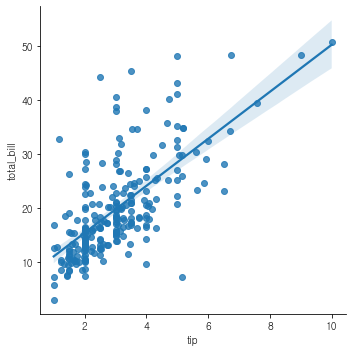

In [53]:
sns.lmplot(x='tip',y='total_bill',data=df)#하나의 plot으로 구성

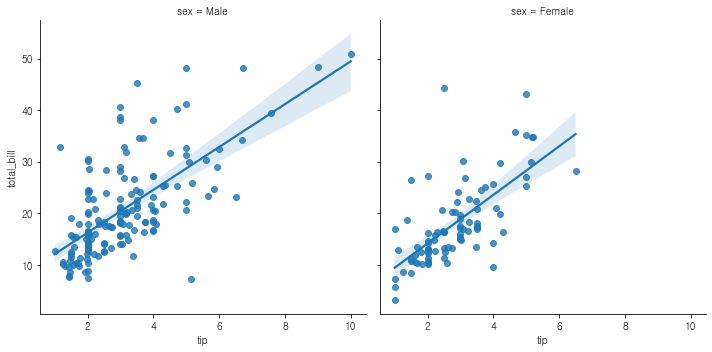

In [54]:
sns.lmplot(x='tip',y='total_bill',data=df,col='sex')#두개의 plot으로 구성(col에 범주형 데이타별 plot구성)

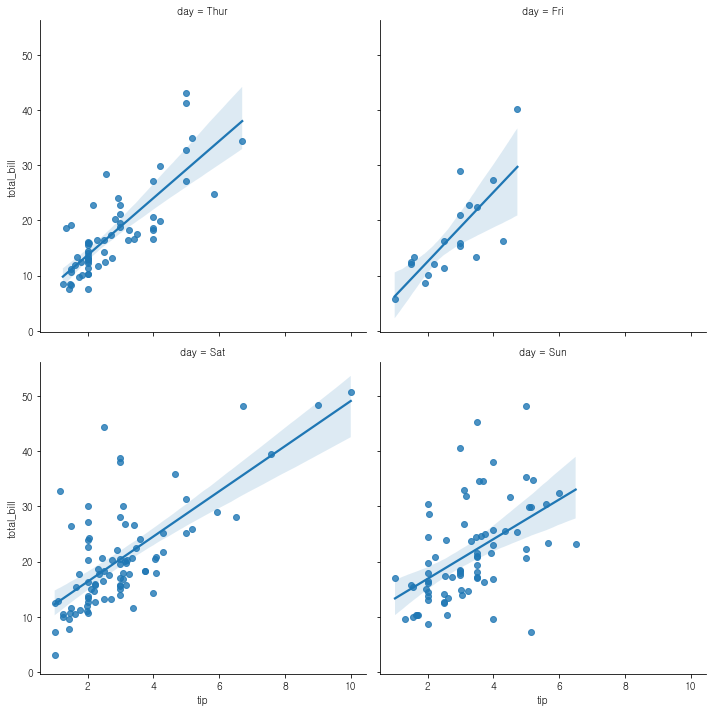

In [55]:
sns.lmplot(x='tip',y='total_bill',data=df,col='day',col_wrap=2)#범주가 4개고 컬럼을 2개씩 구성하니까 2행 2열 plot

#### catplot:수치형데이타 와 범주형 데이타간의 
#### 범주형별로 각기 다양한 그래프를 통해 여러 서브플롯을 구성할 수 있다
#### 그래프는 kind인수에 "strip"(디폴트),"swarm","box","bar","count"등을 설정

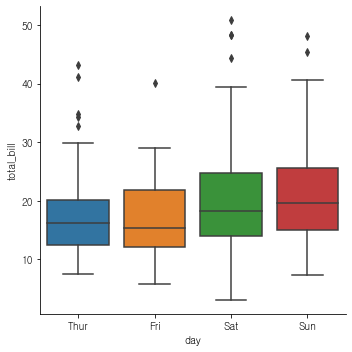

In [56]:
#sns.catplot(x='day',kind='count',data=df)#kind='count' 일때는 x,y중 하나만 범주형 데이타로 지정
sns.catplot(x='day',y='total_bill',kind='box',data=df)#X는 범주형 Y는 수치형데이타.하나의 plot

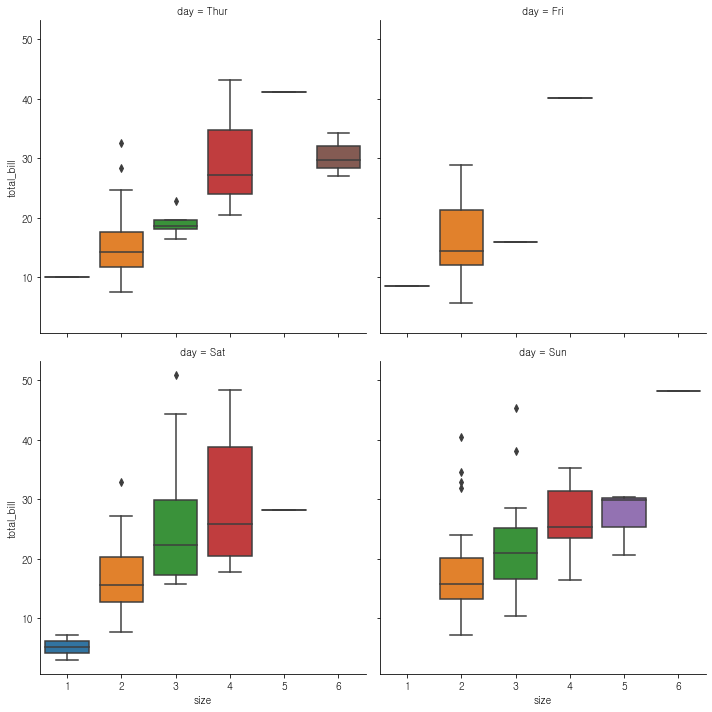

In [57]:
#col인자에는 범주형데이타 x에는 이산형 수치 데이타 y에는 연속형 수치 데이타
sns.catplot(x='size',y='total_bill',kind='box',data=df,col='day',col_wrap=2)#여러개의 plot으로 구성.